# Capstone Project - Predicting Hosuing Prices in Moscow

<h3>Import of important libraries</h3>
<p>Those libraries are needed for further analyis</p> 

<p>Loading the datasets:</p>
    <ul><li><p>train.csv</p></li>
    <li><p>test.csv</p></li>
    <li><p>macro.csv</p></li></ul>

In [1]:
#visuals
%pylab inline
import missingno as msn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)

#data prep
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

#ml algos

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
 
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#loading train dataset
with open("train.csv", 'r') as f:
    train_df = pd.read_csv(f,  parse_dates=['timestamp'])
#loading test dataset
with open("test.csv", 'r') as f:
    test_df = pd.read_csv(f,  parse_dates=['timestamp'])
    #loading macro dataset
with open("macro.csv", 'r') as f:
    macro_df = pd.read_csv(f,  parse_dates=['timestamp'])

# Part 1 - Prepocessing

### So before we go into in depth analysis of the data lets have a first quick at the data 

In [3]:
display(train_df.head())
display(test_df.head())
display(macro_df.head())

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [4]:
display(train_df.shape)
display(train_df.describe())
display(test_df.shape)
display(test_df.describe())
display(macro_df.shape)
display(macro_df.describe())

(30471, 292)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


(7662, 291)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,69.532890,35.777865,12.152310,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,129.533773,76.524992,29.590097,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,7.000000,2.000000,1.000000,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,27.000000,10.000000,2.000000,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,54.000000,25.000000,5.000000,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,643.000000,374.000000,145.000000,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000


(2484, 100)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


### A quick glance already tells us that there are a lot of missing values in the data. Further one can see that all three datasets have the common feature **timestamp**, which we can use to merge the dataframes.

<p>I will merge the test and train datasets with the macro dataset. Therefore I will merge those dataframes based on their timestamp:<p>
<img src="http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png" width="200", align = "left", alt = "blog.codinghorror.com">
<p></p>
<p>Here **A** represents the train and test data while **B** is the macro data</p>

<p>Generation of different dataframes<p>
<ol>
    <li><p>**df_direct**: compromising the attributes which are directly regarding the house.</p></li>
    <li><p>**df_no_macro**: train and test but w/o macro</p></li>
    <li><p>**df_complete**: train and test w/ macro</p></li>
    <li><p>**df_imputed**: df with imputed values -> base for df_pca and df_ppca</p></li>
    <li><p>**df_pca**: complete dataset w/ pca</p></li>
    <li><p>**df_ppca**: partial pca on df_complete - df_direct</p></li>
</ol>

<p>What to do?</p>
<ol>
    <li><p>Generate df_all</p></li>
    <li><p>Make imputations and feature engineering. (different df)</p></li>
    <li><p>train model</p></li>
</ol>

In [5]:
id_test = test_df["id"]
id_train = train_df["id"]
y_log = np.log1p(train_df["price_doc"])

train_df.drop(["id", "price_doc"], axis=1, inplace=True)
test_df.drop("id", axis=1, inplace=True)
#Taken from https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/notebook/notebook
macro_df = macro_df[["timestamp","balance_trade","balance_trade_growth","eurrub","average_provision_of_build_contract",
                     "micex_rgbi_tr","micex_cbi_tr","deposits_rate","mortgage_value","mortgage_rate","income_per_cap",
                     "museum_visitis_per_100_cap","apartment_build"]]                   

In [6]:
df_no_macro = pd.concat([train_df, test_df])
df_complete = pd.merge(left = df_no_macro, right = macro_df, how = "left", on = "timestamp")

display(train_df.shape)
display(test_df.shape)
display(df_no_macro.shape)
display(df_complete.shape)

(30471, 290)

(7662, 290)

(38133, 290)

(38133, 302)

### Ok now that we have merged the dataframes, lets look for missing values and the data's distribution
<p>I want to look at ***how many columns have missing values*** and what features have ***the most missing values***.

From 302 features, 56 having missing values. Thats 19% of them.


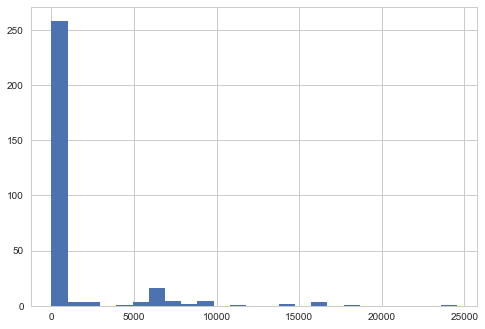

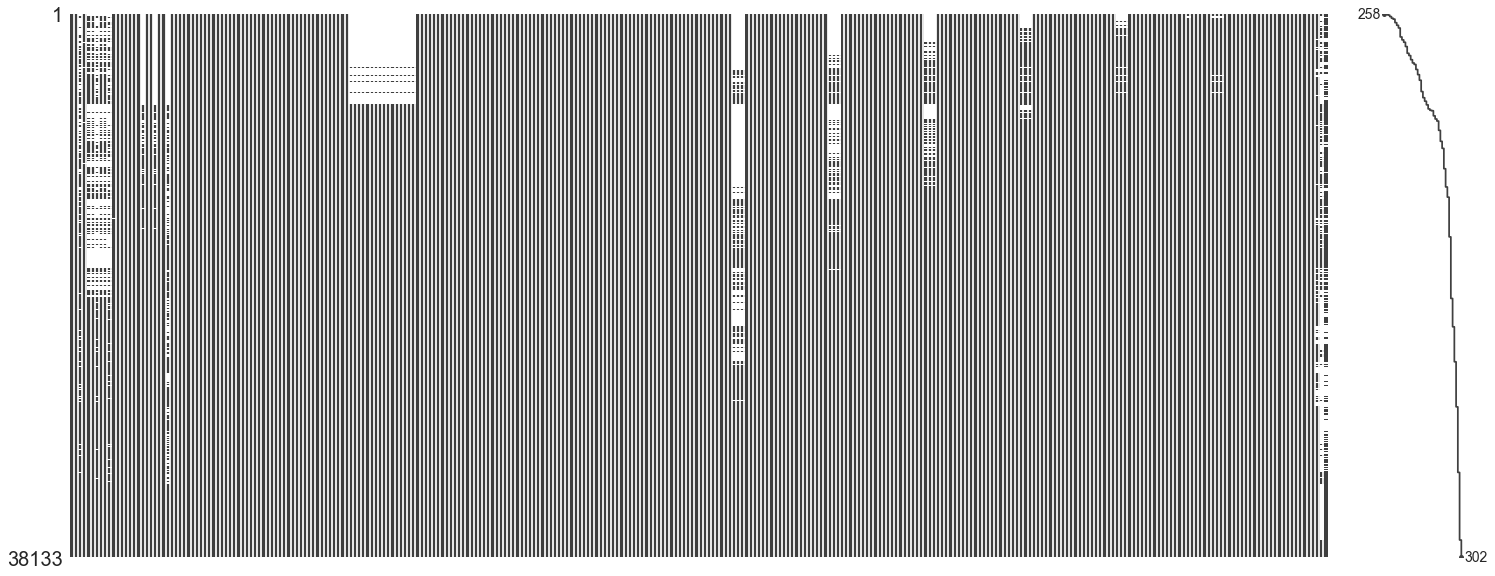

In [7]:
null_values = pd.DataFrame(sorted(df_complete.isnull().sum()))
plt.hist(null_values, bins=25);

no_features = df_complete.shape[1]
no_missing = df_complete.shape[1] - df_complete.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_features, no_missing, round(no_missing/no_features*100),2))

msn.matrix(df_complete, sort="ascending")

<p>Looking at the histogram we can see that there are some features with show very high missing value counts. We should investigate this more.</p>
<p>We can look how much percent of the values are actually missing and what features are those.</p>

In [8]:
total = df_complete.isnull().sum().sort_values(ascending=False)
perc = (df_complete.isnull().sum()/df_complete.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);
"""
#grouping features based on missing values
mt50 = missing_data["Percent"][missing_data["Percent"]>0.5]
mt25 = missing_data["Percent"][(missing_data["Percent"]>0.25) & (missing_data["Percent"]<0.5)]
mt10 = missing_data["Percent"][(missing_data["Percent"]>0.1) & (missing_data["Percent"]<0.25)]
mt5 = missing_data["Percent"][(missing_data["Percent"]>0.05) & (missing_data["Percent"]<0.1)]
lt5 = missing_data["Percent"][missing_data["Percent"]<0.05] 

print("Features with more than 50% missing values: {}".format(len(mt50)))
print("Those are: ")
for i,ind in enumerate(mt50.index):
    print("{} with {}% missing.".format(ind, round(mt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(mt25)))
print("Those are: ")
for i,ind in enumerate(mt25.index):
    print("{} with {}% missing.".format(ind, round(mt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(mt10)))
for i,ind in enumerate(mt10.index):
    print("{} with {}% missing.".format(ind, round(mt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(mt5)))
print("Features with less than 5% missing values: {}".format(len(lt5)))
"""

'\n#grouping features based on missing values\nmt50 = missing_data["Percent"][missing_data["Percent"]>0.5]\nmt25 = missing_data["Percent"][(missing_data["Percent"]>0.25) & (missing_data["Percent"]<0.5)]\nmt10 = missing_data["Percent"][(missing_data["Percent"]>0.1) & (missing_data["Percent"]<0.25)]\nmt5 = missing_data["Percent"][(missing_data["Percent"]>0.05) & (missing_data["Percent"]<0.1)]\nlt5 = missing_data["Percent"][missing_data["Percent"]<0.05] \n\nprint("Features with more than 50% missing values: {}".format(len(mt50)))\nprint("Those are: ")\nfor i,ind in enumerate(mt50.index):\n    print("{} with {}% missing.".format(ind, round(mt50[i]*100,2)))\nprint("\n")\nprint("Features with more than 25% missing values: {}".format(len(mt25)))\nprint("Those are: ")\nfor i,ind in enumerate(mt25.index):\n    print("{} with {}% missing.".format(ind, round(mt25[i]*100,2)))\nprint("\n")\nprint("Features with more than 10% missing values: {}".format(len(mt10)))\nfor i,ind in enumerate(mt10.index)

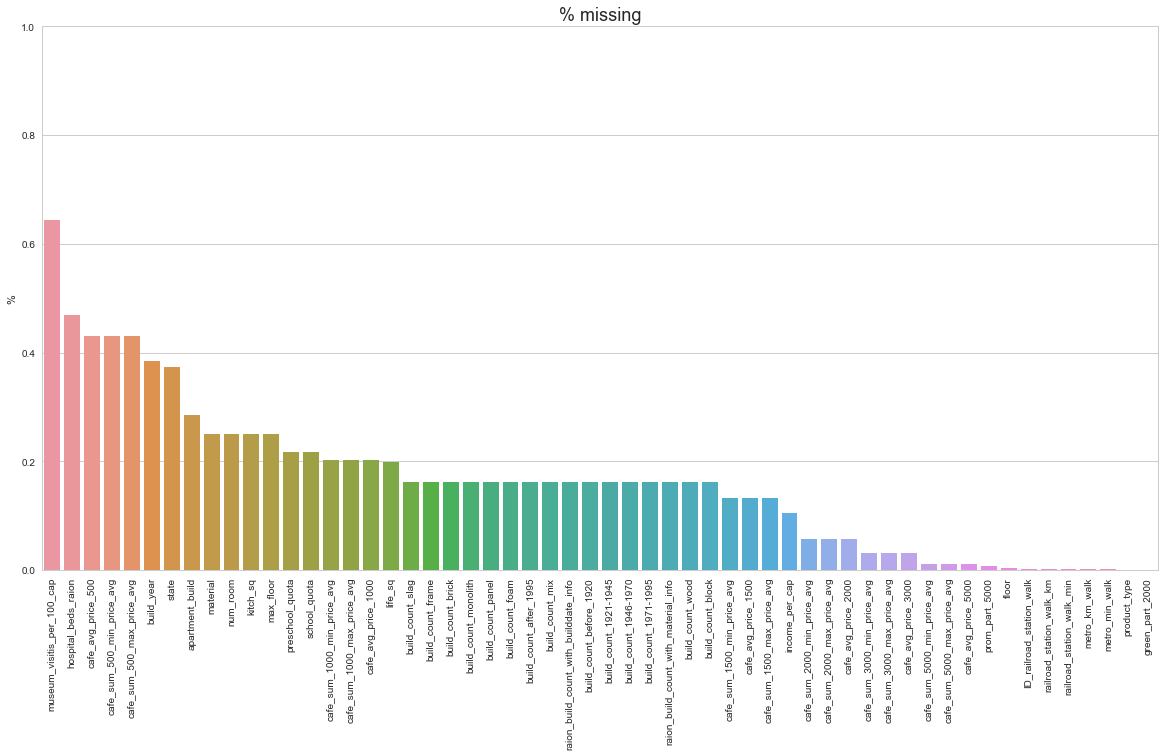

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=perc[perc > 0].index, y=perc[perc > 0]);
plt.title("% missing", fontsize=18)
plt.ylabel("%")
plt.ylim(0,1);

<p>Ok, lets quickly look at the test.csv and if more or less the same features show high missing value counts</p>

<p>So there are some features with a lot of missing values, which are probably important for the house price.</p>
<p>When we look at the features we have basically 3 types of features:</p>
<ul>
    <li><p>Features of the house itself (e.g. *num_room*).</P></li>
    <li><p>Features of the neighbourhood (e.g. *oil_chemistry_*).</P></li>
    <li><p>Features of Russia's economy (e.g. *gdp_annual*).</P></li>
</ul>
<p>Features of the house itself are probably most important for price predictions, therefore I will carefully look at those. Those features are:</p>
<ul>
    <li><p>**price_doc**: This is our target variable, the housing price in rubel.</P></li>
    <li><p>**id**: This is the id of the house. This is not important and we can drop it.</P></li>
    <li><p>**full_sq**: This are the total m² of the house.</P></li>
    <li><p>**life_sq**: This are the living room m².</P></li>
    <li><p>**floor**: This is only for apartments and shows the floor on which the apartment is.</P></li>
    <li><p>**max_floor**: The max floor of the building the apartment is in.</P></li>
    <li><p>**material**: The material of the walls:
    <ol>
        <li><p>panel</p></li>
        <li><p>brick</p></li>
        <li><p>wood</p></li>
        <li><p>mass concrete</p></li>
        <li><p>breezeblock</p></li>
        <li><p>mass concrete plus brick</p></li>
    </ol><p></p>
    <li><p>**build_year**: The year in which the house was (will be) build. (*This can also be in the future*)</P></li>
    <li><p>**kitch_sq**: This are the kitchen m².</P></li>
    <li><p>**num_room**: number of living rooms</P></li>
    <li><p>**state**: The state in which the house is (4 best, 1 worst).</P></li>
    <li><p>**product_type**: owner-occupier purchase or investment.</P></li>
    <li><p>**sub_area**: name of the district.</P></li>
</ul>
<p>Let's have a closer look at those. So we have continous numeric features:</p>
<ul><li><p>price_doc, full_sq, life_sq, kitch_sq</p></li></ul>
<p>some discrete numeric features:</p>
<ul><li><p>floor, max_floor, build_year, num_room</p></li></ul>
<p>and some categorical</p>
<ul><li><p>material, product_type, sub_area and state</p></li></ul>

<p>Lets explore them</p>

### Continous Feature Cleaning

In [10]:
cont = ["full_sq", "life_sq","kitch_sq"]
disc = ["floor", "max_floor", "build_year", "num_room"]
cat = ["material", "state", "product_type"]

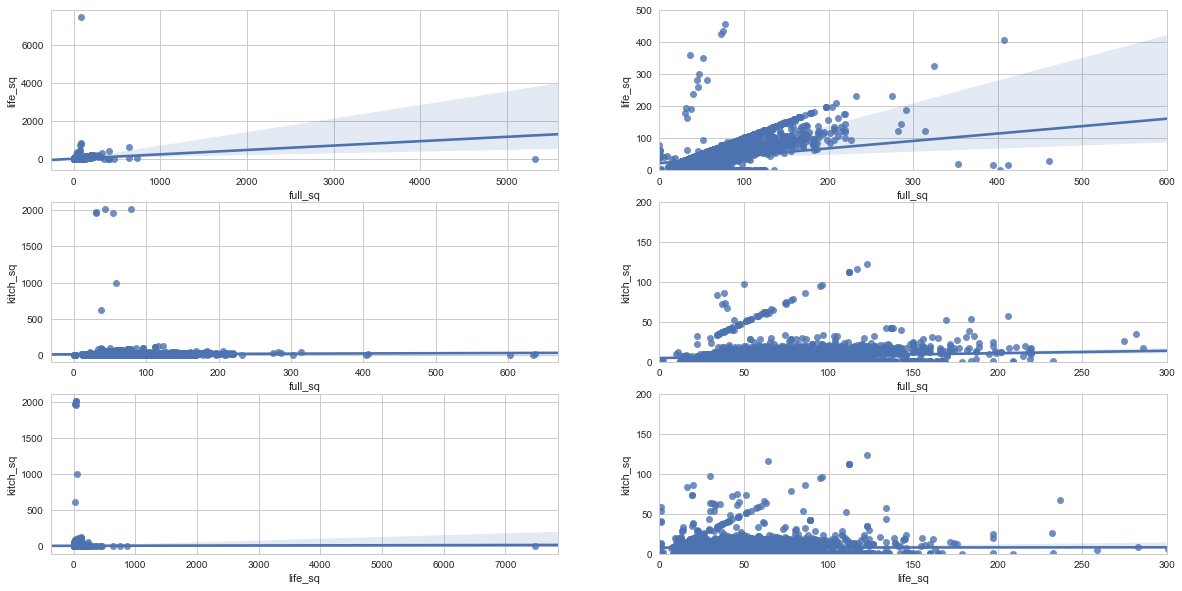

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"])
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"])
plt.subplot(323)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"])
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"])
plt.subplot(325)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"])
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"])

<p>A quick plot reveals some severe outliers, which we would like to reove.</p>
<p>When we look at the plots we can observe the following:</p>
<ol>
    <li><p>For some values ***life_sq > full_sq***.</p></li>
    <li><p>For some values ***kitch_sq > full_sq***.</p></li>
    <li><p>All three features show some outliers.</p></li>
    <li><p>The ratio of ***full_sq : life_sq*** seems to be terribly off for some cases.</p></li>
</ol>
<p>When we look at the features full_sq, life_sq and kitch_sq we can set up following rules: </p>
<ol>
    <li><p>full_sq >= life_sq > kitch_sq</p></li>
    <li><p>full_sq > 5 & life_sq > 5</p></li>
    <li><p>full_sq < 500</p></li>
    <li><p>life_sq < 500</p></li>
    <li><p>(kitch_sq >= 1 & full_sq < 15) or kitch_sq > 1</p></li>
    <li><p>life_sq/full_sq < 0.4</p></li>
</ol>
<p>I chose a cutoff of 5 m² since there are micro appartments with comparable sizes.</p>
<p>We will look at violation in detail and decide what to do.</p>


In [12]:
for i in range(len(df_complete)):
    if df_complete.loc[i, "full_sq"] < 5 or df_complete.loc[i, "full_sq"] > 500:
        df_complete.loc[i, "full_sq"] = np.NaN
    if df_complete.loc[i, "life_sq"] > df_complete.loc[i, "full_sq"] or df_complete.loc[i, "life_sq"] < 5 or\
    df_complete.loc[i, "life_sq"] > 500:
        df_complete.loc[i, "life_sq"] = np.NaN
    if df_complete.loc[i, "kitch_sq"] >= df_complete.loc[i, "full_sq"] or\
    df_complete.loc[i, "kitch_sq"] >= df_complete.loc[i, "life_sq"] and df_complete.loc[i, "life_sq"] > 5 or\
    df_complete.loc[i, "kitch_sq"] <= 1 and df_complete.loc[i, "full_sq"] <= 15 or\
    df_complete.loc[i, "kitch_sq"] < 2:
        df_complete.loc[i, "kitch_sq"] = np.NaN
    if df_complete.loc[i, "full_sq"] > 0 and df_complete.loc[i, "life_sq"] > 0:
        if df_complete.loc[i, "life_sq"]/df_complete.loc[i, "full_sq"] < 0.4:
            df_complete.loc[i, "life_sq"] = np.NaN

<p>Ok so this should do it for the continous numeric features. However, before we move on lets visualize these again in order to see if the plots are looking better.</p>

,full_sq,life_sq,kitch_sq
count,38098.000000,29354.000000,20078.000000
mean,53.935412,34.624449,8.162696
std,21.447614,18.053361,2.748633
min,5.000000,8.000000,2.000000
25%,38.960000,20.000000,6.000000
50%,50.000000,30.000000,8.000000
75%,63.000000,43.000000,10.000000
max,461.000000,407.000000,57.000000


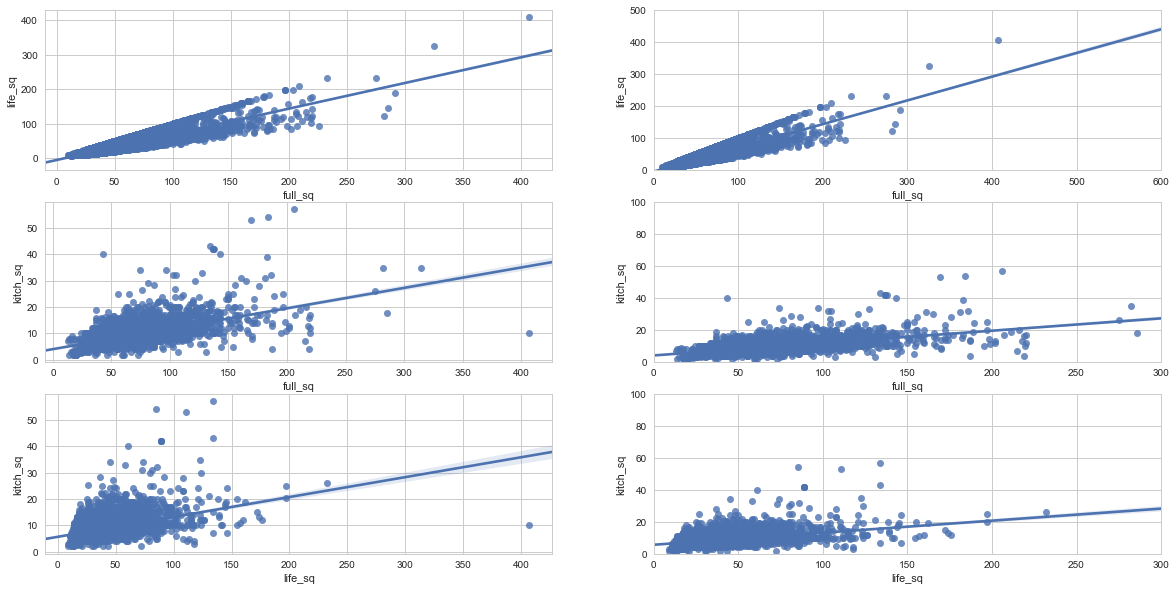

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"]);
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"]);
plt.subplot(323)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"]);
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"]);
plt.subplot(325)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"]);
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"]);

display(df_complete[cont].describe());

### Discrete Feature Cleaning
<p>So after we dealt with the continous numeric features lets have a look at the discrete features.n Again lets start with some basic exploration and visualization.</p>

In [14]:
df_complete[disc].describe()

,floor,max_floor,build_year,num_room
count,37966.000000,28561.000000,2.347900e+04,28561.000000
mean,7.667123,12.567592,2.716785e+03,1.900844
std,5.276156,6.730496,1.308521e+05,0.847620
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,9.000000,1.966000e+03,1.000000
50%,7.000000,12.000000,1.980000e+03,2.000000
75%,11.000000,17.000000,2.006000e+03,2.000000
max,77.000000,117.000000,2.005201e+07,19.000000


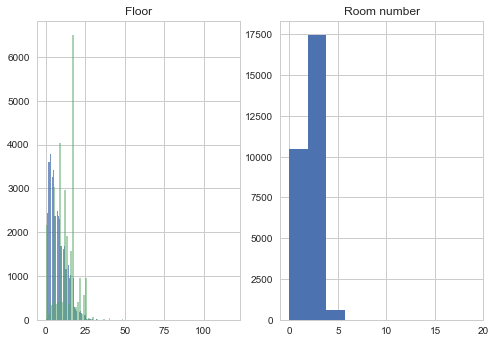

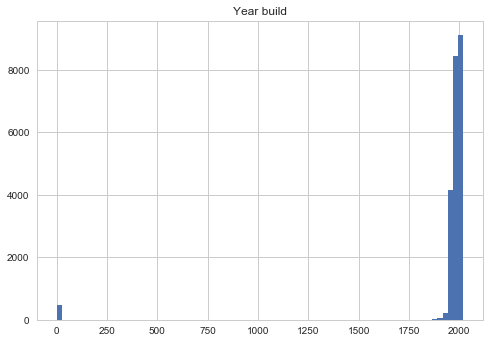

In [15]:
plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(df_complete["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(df_complete["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(df_complete["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(df_complete["build_year"].dropna())[1000:-50], bins=80);

### Cleaning the discrete values
<p>Ok so there are some things to do:</p>
<ul><li><p>**Floors**</p>
        <ol>
            <li><p>The Oko1 tower is Moscow's highest skyscraper with 85 floors.
            This is the max value for floor and max_floor.</p></li>
            <li><p>The floor must not be larger than the max_floor value.</p>
            *After lookig at the values in detail it seems not likely that values were just swapped.*</li>
        </ol>
    </li><p></p>
    <li><p>**num_room**</p>
        <ol>
            <li><p>The room number should be larger than 0.</p></li>
            <li><p>We can also compare the room_num with life_sq. The average room size shouldn't be smaller than 4 m².</p></li>
        </ol>
    </li><p></p>
    <li><p>**build_year**</p>
        <ol>
            <li><p>There are two outlier which will be manually corrected.</p></li>
            <li><p>Values smaller than 1900 will be replaced with NaN.</p></li>
        </ol>
    </li>
</ul>

In [16]:
df_complete.loc[10089, "build_year"] = 2007
df_complete.loc[15220, "build_year"] = 1965

for i in range(len(df_complete)):
    if df_complete.loc[i, "floor"] > 85:
        df_complete.loc[i, "floor"] = np.NaN
    if df_complete.loc[i, "max_floor"] > 85:
        df_complete.loc[i, "max_floor"] = np.NaN
    if df_complete.loc[i, "max_floor"] < df_complete.loc[i, "floor"]:
        df_complete.loc[i, "max_floor"] = np.NaN
    
    if df_complete.loc[i, "build_year"] < 1500:
        df_complete.loc[i, "build_year"] = np.NaN
    if df_complete.loc[i, "build_year"] > 2020:
        df_complete.loc[i, "build_year"] =np.NaN
        
    if df_complete.loc[i, "num_room"] == 0:
        df_complete.loc[i, "num_room"] = np.NaN
    if df_complete.loc[i, "life_sq"] > 0 and df_complete.loc[i, "num_room"] > 0:    
        if df_complete.loc[i, "life_sq"]/df_complete.loc[i, "num_room"] < 4:
            df_complete.loc[i, "num_room"] = np.NaN

,floor,max_floor,build_year,num_room
count,37966.000000,26421.000000,22018.000000,28541.000000
mean,7.667123,13.499716,1986.252066,1.899338
std,5.276156,5.962326,21.297968,0.826756
min,0.000000,0.000000,1691.000000,1.000000
25%,3.000000,9.000000,1969.000000,1.000000
50%,7.000000,14.000000,1983.000000,2.000000
75%,11.000000,17.000000,2008.000000,2.000000
max,77.000000,57.000000,2019.000000,9.000000


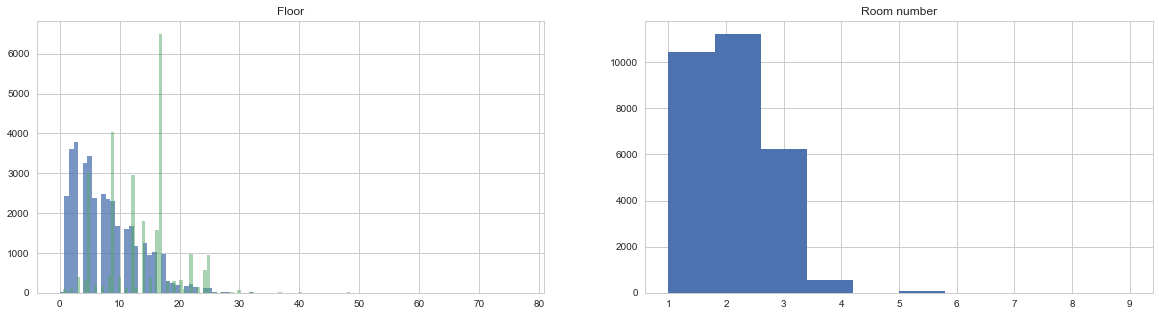

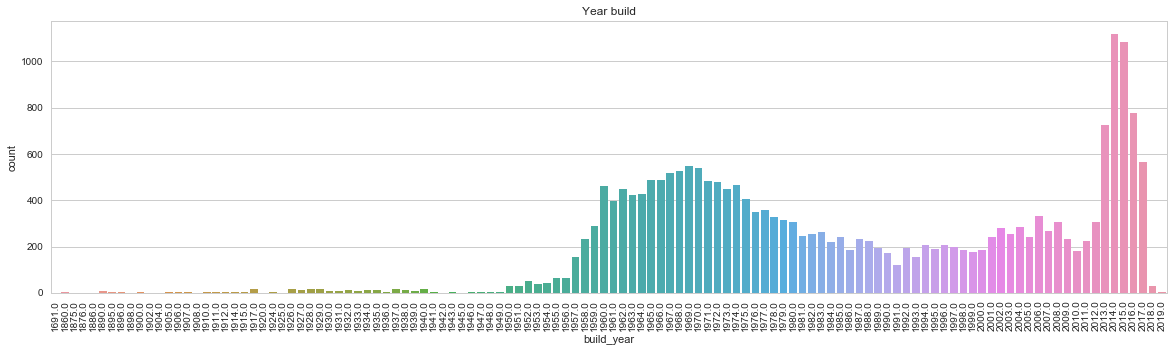

In [17]:
display(df_complete[disc].describe())

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title("Floor")
plt.hist(df_complete["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(df_complete["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(df_complete["num_room"].dropna(), bins=10);
plt.figure(figsize=(20,5))
plt.title("Year build")
plt.xlim(1900,2020)
plt.xticks(rotation=90)
sns.countplot(df_complete["build_year"])

 ### Categorical Feature Cleaning
 <p>So we have 4 categorical features that might need some cleaning. We know that there are 6 material types, 4 state types and 2 product types.</p>

In [18]:
for i in cat:
    display(df_complete[i].value_counts())

1.0    19438
2.0     3951
5.0     2048
4.0     1963
6.0     1159
3.0        2
Name: material, dtype: int64

2.0     8506
3.0     7703
1.0     7121
4.0      549
33.0       1
Name: state, dtype: int64

Investment       24446
OwnerOccupier    13654
Name: product_type, dtype: int64

In [19]:
x = (df_complete["state"][df_complete["state"] == 33].index[0])
df_complete.loc[x, ["state"]] = 3

In [20]:
df_complete['year'] = df_complete.timestamp.dt.year
df_complete['month'] = df_complete.timestamp.dt.month
df_complete['dow'] = df_complete.timestamp.dt.dayofweek
df_complete.drop(['timestamp'], axis=1, inplace=True)

#### short summary:
#### We merged the train, test and macro df into one big dataframe and afterwards we looked at missing values and looked data inconsitencies for important features in detail. Next steps will be to facorize categorical features. 
#### Afterwards in one approach I will try a PCA analysis. Therefore the missing values of the data have to be imputed and the data has to be scaled and normalized. 
#### Then the different models will be trained on the different dataframes using crossvalidation. Here I will have to think of a good pipeline implementation to come up with. Further the data has to be in good shape since this will indeed be a rather time consuming step. 

In [21]:
df_complete_num = df_complete.select_dtypes(exclude = ["object"])
df_complete_obj = df_complete.select_dtypes(include = ["object"]).copy()
df_complete_obj.fillna("NaN", inplace=True)
enc = LabelEncoder()
for obj in df_complete_obj:
        df_complete_obj[obj] = enc.fit_transform(df_complete_obj[obj])

In [22]:
df_complete_obj.describe()
#features with more than 2 categorical features sub_area, ecology, material (also state but this will be left for the moment
#not sure if onehotencoding is a good thing to do... I wont do it ftm 

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000
mean,0.716991,76.781108,0.068681,0.054231,0.067710,0.009467,0.358456,0.038130,0.087955,0.029161,0.100438,0.075918,0.028951,0.029686,2.008785
std,0.958678,39.450940,0.252914,0.226476,0.251252,0.096837,0.479553,0.191512,0.283234,0.168260,0.300587,0.264871,0.167672,0.169721,1.236021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,105.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,2.000000,145.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [23]:
df_complete_encoded = pd.concat([df_complete_num, df_complete_obj], axis=1)
pos = len(train_df)
df_no_macro = df_complete_encoded.drop(macro_df.columns[1:], axis=1)
df_train1 = df_no_macro[:pos]
df_test1 = df_no_macro[pos:]

df_train2 = df_complete_encoded[:pos]
df_test2 = df_complete_encoded[pos:]

#### Ok so at this point we have a df_train a df_test and y_log, this dfs can be used to train boosting algos which are insentive to missing values and do not rely on scaled or normalized data. I will try to run a xgboost a light general boost and a random forest ensemble on this datasets. 
#### I also will impute missing values, scale and normlize the data and perfom pca. Afterwards I will run besides the upper algos additionaly a ridge and lasso regression on the dfs.
#### The best performing untuned model will then be subjected to hyperparameter tuning

# Some exploration of the cleaned data

### Correlation matrix 

In [24]:
#cor = test_df.select_dtypes(exclude = ["object"]).corr()

In [25]:
#plt.figure(figsize=(20,20))
#sns.clustermap(cor, square=True, linewidth=1, annot= False, cmap=cmap);
#sns.heatmap(cor)
#plt.xticks(rotation=45);
#plt.yticks(rotation=0);

#cholesky = np.linalg.cholesky(cor)
#for i in cholesky:
#    print(i)

### Categorical features
<p>***Material***</p>
<p>When we look at the categorical features we can see that the material does not show to high correlation with the target variable. Maybe material 2 shows slightly higher, while material 5 slightly lower prices.<p> 
<p>***State***</p>
<p>when we look at the state we can see a increase of the target variable with higher state.</p>
<p>***Product type***</p>
<p>Product types does not have too much of an influence on the price</p>

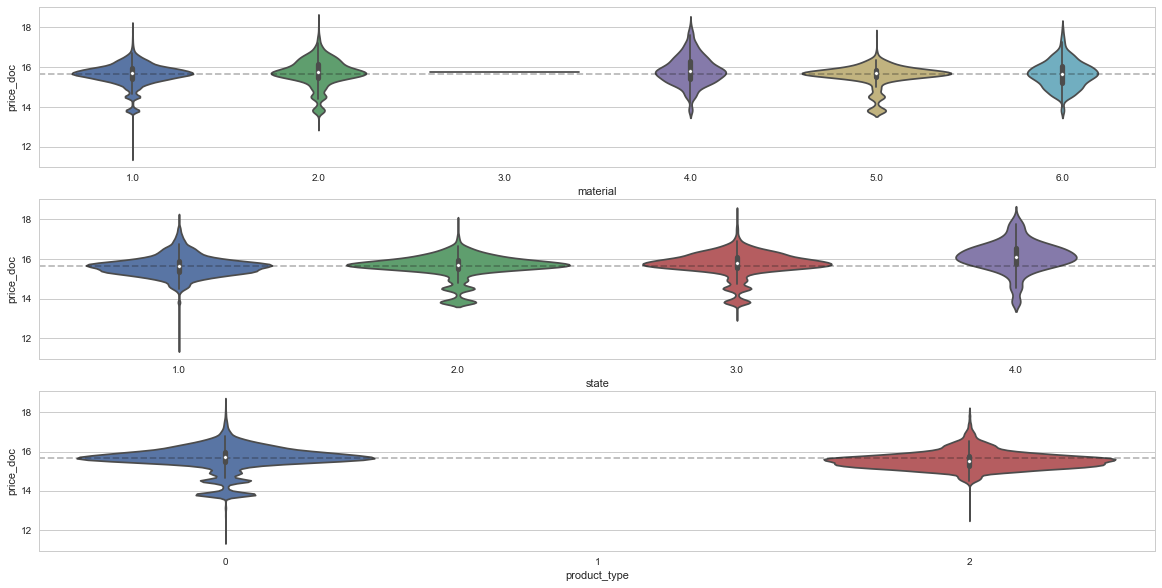

In [26]:
plt.figure(figsize=(20,10))
ax = plt.subplot(311)
sns.violinplot(x="material", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(312)
sns.violinplot(x="state", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(313)
sns.violinplot(x="product_type", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)

# Continous variables
<p>There are some obvious correlations between those. Lets look at them some more and maybe group them in a new variable, in order to reduce dimensionality.</p>

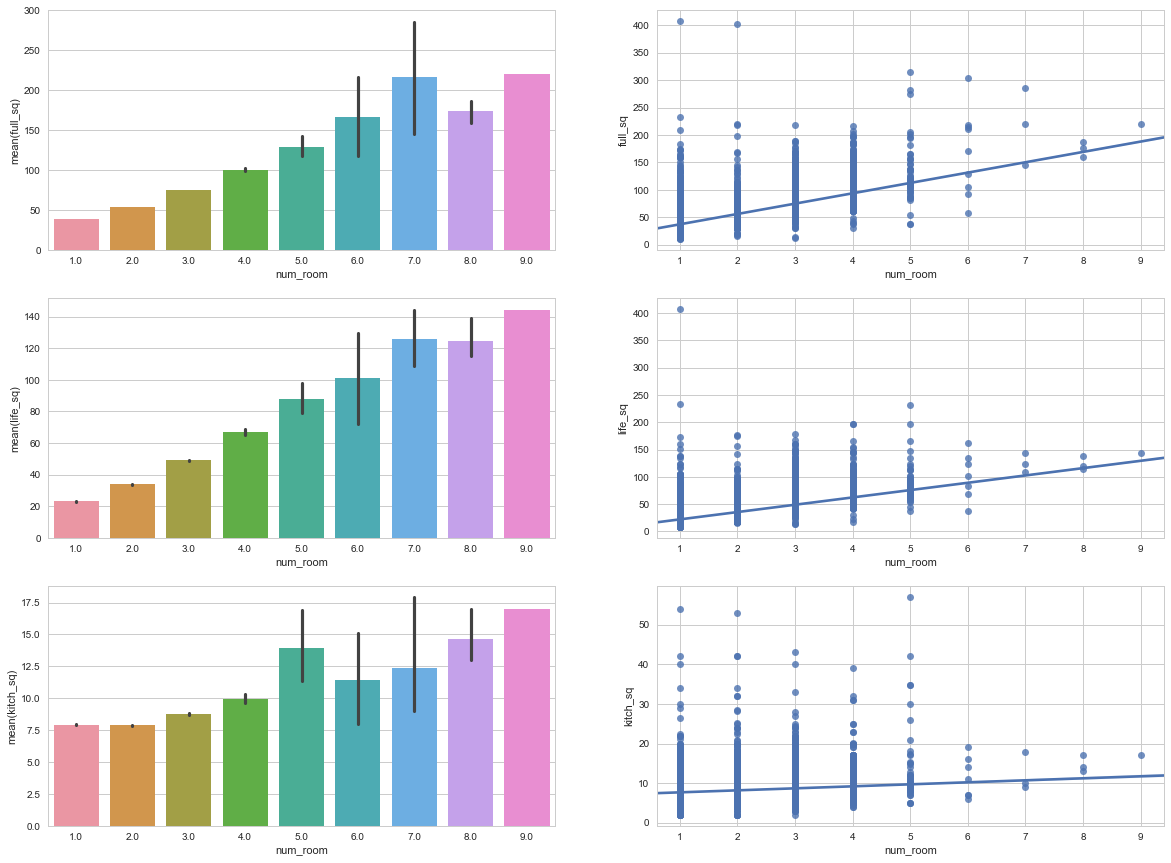

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sns.barplot("num_room", "full_sq", data=df_complete_encoded)
plt.subplot(322)
sns.regplot("num_room", "full_sq", data=df_complete_encoded)
plt.subplot(323)
sns.barplot("num_room", "life_sq", data=df_complete_encoded)
plt.subplot(324)
sns.regplot("num_room", "life_sq", data=df_complete_encoded)
plt.subplot(325)
sns.barplot("num_room", "kitch_sq", data=df_complete_encoded)
plt.subplot(326)
sns.regplot("num_room", "kitch_sq", data=df_complete_encoded)

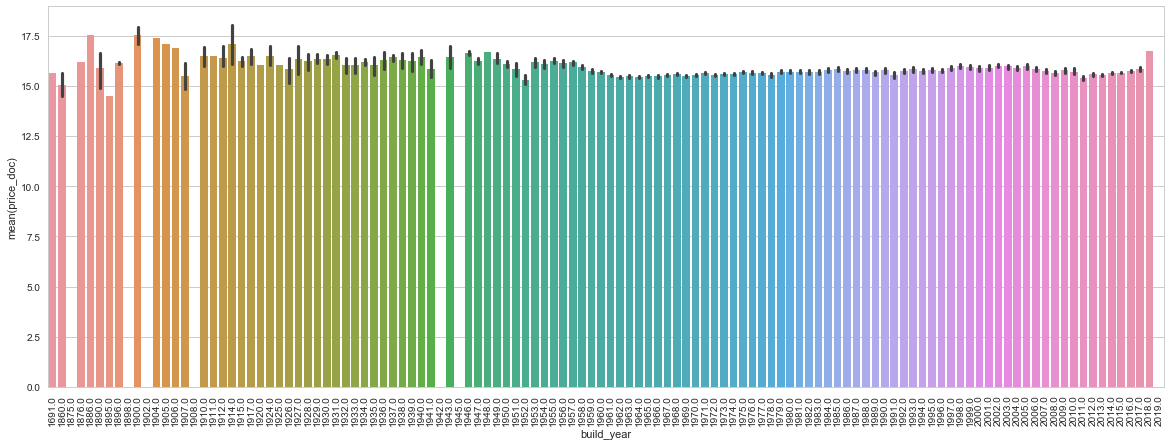

In [28]:
plt.figure(figsize=(20,7))
sns.barplot("build_year", y_log, data=df_complete_encoded);
plt.xticks(rotation=90);

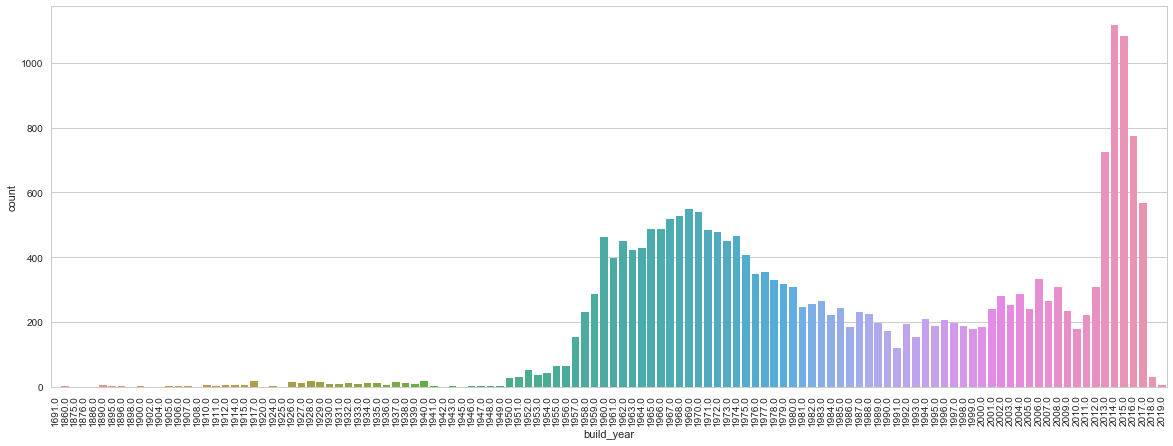

In [29]:
plt.figure(figsize=(20,7))
sns.countplot("build_year", data=df_complete_encoded);
plt.xticks(rotation=90);

(1850, 2025)

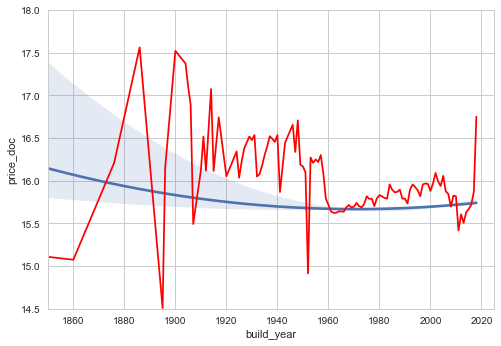

In [30]:
x = pd.concat([df_train1["build_year"], y_log], axis=1)
aver = x.groupby("build_year")[["build_year", "price_doc"]].median()
#recent = df_complete_encoded[["build_year", "price_doc"]][df_complete_encoded["build_year"] > 1850]
sns.regplot("build_year", y_log, data=df_train1, scatter=False, order=2,truncate=True)
plt.plot(aver["build_year"], aver["price_doc"], color ="red")
plt.ylim(14.5,18)
plt.xlim(1850,2025)

# Ok so lets save the encoded features for later until we have dealt with the numeric ones

# Feature Reduction 

## I will try to reduce the dimensionality of this data  via PCA

## Principal Component Analysis

### Ok so now lets attempt to reduce the dimensionality of the remaining features by applying a PCA.
### For the PCA to yield reliable results we have to do some data transformation first.

<ol>
    <li><p>Pick all numeric features.</p></li>
    <li><p>Drop features with too many missing values.</p></li>
    <li><p>Scale data -> minMaxScaler.</p></li>
    <li><p>Remove features which do not show any variance.</p></li>
    <li><p>Remove outlier.</p></li>
    <li><p>Check normality and maybe try transformation</p></li>
    <li><p>PCA</p></li>
</ol>

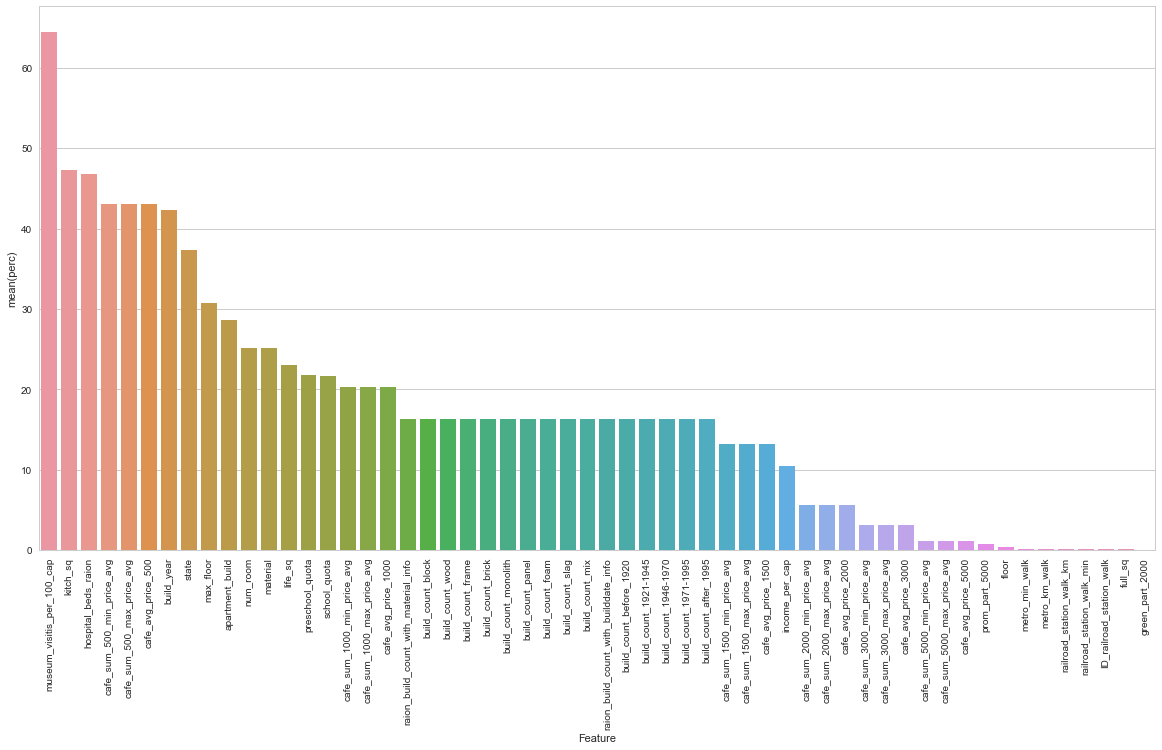

In [31]:
m = df_complete_encoded.isnull().sum()

missing = zip(df_complete_encoded.columns, m)
missing = sorted(missing, key = lambda x: x[1], reverse=True)
missing = pd.DataFrame(missing)
missing.columns = ["Feature", "Missing"]
missing = missing[missing["Missing"] > 0]
missing["perc"] = missing["Missing"]/len(df_complete_encoded)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(missing["Feature"], missing["perc"])

<p>Gonna drop features which show too much missing values. I will choose >20% missing as cutoff. The other features
are going to be imputed. I will first try a simple median impuation. I will drop features in both datasets.</p>

In [32]:
missing = missing[missing["perc"] > 20]

df_complete_imputation = df_complete_encoded.drop(missing["Feature"], axis=1, inplace = False)

In [33]:
df_complete_imputation.fillna(df_complete_imputation.median(), inplace=True);

In [34]:
#scale data
from sklearn.preprocessing import MinMaxScaler, normalize
scaler = MinMaxScaler()
cols = df_complete_imputation.columns
df_complete_imputation = scaler.fit_transform(df_complete_imputation)
df_complete_imputation = normalize(df_complete_imputation)
df_complete_imputation = pd.DataFrame(df_complete_imputation)
df_complete_imputation.columns = cols

# Check for outlier via IsolationForest 

In [35]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
x = iso.fit(df_complete_imputation)
pred = x.predict(df_complete_imputation)

In [36]:
unique, counts = numpy.unique(pred, return_counts=True)
res = dict(zip(unique, counts))

print(res)

{1: 34319, -1: 3814}


In [37]:
pred_bools = pd.DataFrame(pred, columns=["outlier"])
df_complete_imputation  = pd.concat([df_complete_imputation, pred_bools], axis=1)
df_complete_imputation = df_complete_imputation[df_complete_imputation["outlier"] == 1]
df_complete_imputation.drop("outlier", axis=1, inplace=True)

In [38]:
print(df_complete_imputation.shape)

(34319, 286)


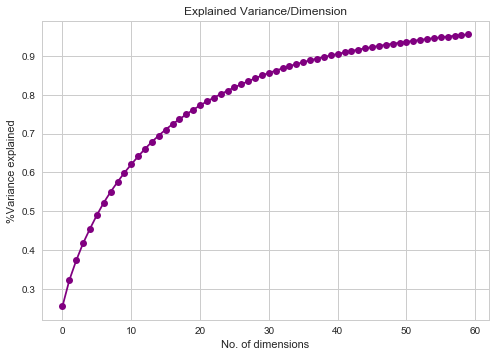

In [39]:
pca = PCA(n_components = 60)
pca = pca.fit(df_complete_imputation)
explained = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(60), np.cumsum(explained), 'o-', color='purple')
plt.title("Explained Variance/Dimension")
plt.xlabel("No. of dimensions")
plt.ylabel("%Variance explained")

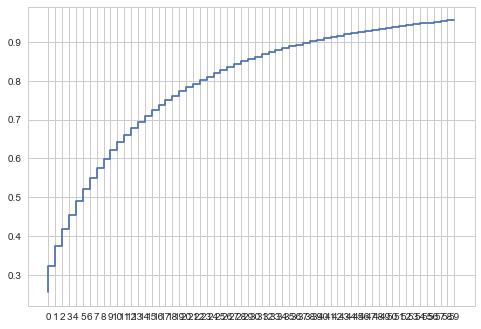

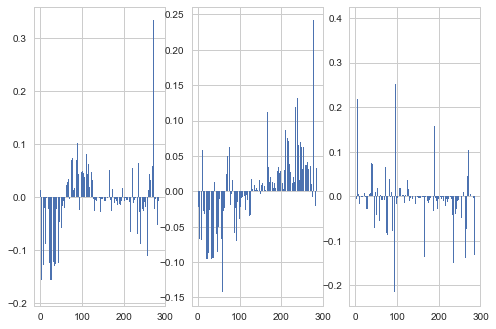

In [40]:
import heapq
plt.figure()
plt.step(range(60), np.cumsum(explained))
plt.xticks(range(60));
dimensions = pca.components_[:3]
plt.figure()
ind = []
for i, dim in enumerate(dimensions):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(df_complete_imputation.columns)), dim)
    ind.append(np.argpartition(dim, -15)[-15:])

In [41]:
for i in ind:
    print(df_complete_imputation.columns[i])

Index(['kremlin_km', 'ttk_km', 'sub_area', 'product_type', 'bulvar_ring_km',
       'zd_vokzaly_avto_km', 'ID_bus_terminal', 'oil_chemistry_km',
       'sadovoe_km', 'ID_railroad_station_avto', 'railroad_station_avto_km',
       'green_part_3000', 'green_zone_part', 'detention_facility_km',
       'ID_big_road1'],
      dtype='object')
Index(['prom_part_1500', 'market_count_3000', 'prom_part_2000', 'indust_part',
       'trc_count_5000', 'sport_count_3000', 'prom_part_3000',
       'radiation_raion', 'ID_railroad_terminal', 'market_count_5000',
       'sport_count_5000', 'mosque_count_5000', 'trc_sqm_5000',
       'prom_part_5000', 'ecology'],
      dtype='object')
Index(['school_education_centers_raion', 'product_type',
       'ID_railroad_station_avto', 'prom_part_3000',
       'preschool_education_centers_raion', 'prom_part_1000', 'ID_big_road2',
       'micex_rgbi_tr', 'ID_railroad_station_walk', 'prom_part_2000',
       'incineration_raion', 'balance_trade', 'indust_part', 'prom_p

In [42]:
df_pca = pca.transform(df_complete_imputation)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ["PC" + str(i+1) for i in range(len(df_pca.columns))]

In [43]:
HALT! STOP!
y = y_log
X = df_complete_encoded
#X = X[X.columns[X.dtypes!="object"]]

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

#plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

SyntaxError: invalid syntax (<ipython-input-43-c25950443eed>, line 1)

In [ ]:
df_ppca_main = pd.concat([df_complete_encoded[cont], df_complete_encoded[disc], df_complete_encoded[cat]], axis=1) 

pred_bools = pd.DataFrame(pred, columns=["outlier"])
df_ppca_main  = pd.concat([df_ppca_main, pred_bools], axis=1)
df_ppca_main = df_ppca_main[df_ppca_main["outlier"] == 1]
df_ppca_main.drop("outlier", axis=1, inplace=True)

df_ppca_side = df_complete_imputation.copy()
for feature in df_ppca_main.columns:
    try:
        df_ppca_side.drop(feature, axis=1, inplace=True)
    except:
        print("{} has already been dropped.".format(feature))

In [ ]:
ppca = PCA(n_components = 60)
ppca = ppca.fit(df_ppca_side)
explained = ppca.explained_variance_ratio_
df_ppca_side = ppca.transform(df_ppca_side)

In [ ]:
import heapq
plt.figure()
plt.step(range(60), np.cumsum(explained))
plt.xticks(range(60));
dimensions = ppca.components_[:3]
plt.figure()
ind = []
for i, dim in enumerate(dimensions):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(df_ppca_side.columns)), dim)
    ind.append(np.argpartition(dim, -15)[-15:])

In [ ]:
for i in ind:
    print(df_ppca_side.columns[i])

In [ ]:
df_ppca_side = pd.DataFrame(df_ppca_side)
df_ppca_side.columns = ["PC" + str(i+1) for i in range(len(df_ppca_side.columns))]

In [ ]:
df_ppca = pd.concat([df_ppca_main, df_ppca_side], axis = 1)

In [ ]:
df_train3 = df_complete_imputation[:pos] 
df_test3 = df_complete_imputation[pos:]

df_train4 = df_pca[:pos]
df_test4 = df_pca[pos:]

df_train5 = df_ppca[:pos]
df_test5 = df_ppca[pos:]

# At this point we've got the following datastructures:
<ol>
<li><p>**train_df**&emsp;&emsp;&emsp;	train dataframe w/o id, price_doc</p></li> 
<li><p>**test_df**	&emsp;&emsp;&emsp;			test dataframe w/o id</p></li>
<li><p>**y_log**	&emsp;&emsp;&emsp;			log1p of price_doc </p></li>
<p></p>
<li><p>**df_no_macro**	&emsp;&emsp;&emsp;		train and test w/o macro</p></li>
<li><p>**df_complete**	&emsp;&emsp;&emsp;	train, test and certain macro features</p></li>
<li><p>**df_complete_encoded**	&emsp;&emsp;&emsp;	train, test and certain macro features labelencoded</p></li>
<li><p>**df_complete_imputation**&emsp;&emsp;&emsp;		train,test and certain macro features w/ median impuation</p></li>
<li><p>**df_pca** 	&emsp;&emsp;&emsp;			full pca on df reduction to 60 dimensions</p></li>
<li><p>**df_ppca**		&emsp;&emsp;&emsp;		partial pca, leaving out the 10 most important features</p></li>
<p></p>
<li><p>**df_train1**	&emsp;&emsp;&emsp;		split of df_no_macro</p></li>
<li><p>**df_test1**	&emsp;&emsp;&emsp;		split of df_no_macro</p></li>
<p></p>
<li><p>**df_train2**&emsp;&emsp;&emsp;			split of df_complete_encoded</p></li>
<li><p>**df_test2**	&emsp;&emsp;&emsp;		split of df_complete_encoded</p></li>
<p></p>
<li><p>**df_train3**&emsp;&emsp;&emsp;			split of df_complete_imputation</p></li>
<li><p>**df_test3**	&emsp;&emsp;&emsp;		split of df_complete_imputation</p></li>
<p></p>
<li><p>**df_train4**&emsp;&emsp;&emsp;			split of df_pca</p></li>
<li><p>**df_test4**	&emsp;&emsp;&emsp;		split of df_pca</p></li>
<p></p>
<li><p>**df_train5**&emsp;&emsp;&emsp;			split of df_ppca</p></li>
<li><p>**df_train5**&emsp;&emsp;&emsp;			split of df_ppca</p></li>
</ol>

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
#df_columns = X_train.columns
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

num_boost_round = partial_model.best_iteration

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)


In [ ]:
final_test.get_dtype_counts()
final_train.get_dtype_counts()

In [ ]:
ylog_pred = partial_model.predict(final_test)
#y_pred = np.exp(ylog_pred) - 1

#df_sub = pd.DataFrame({'id': test_merge["id"], 'price_doc': y_pred})

#df_sub.to_csv('sub.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

In [ ]:
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

In [ ]:
df_train = pd.read_csv("train.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("test.csv", parse_dates=['timestamp'])
df_macro = pd.read_csv("macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)

df_train.head()

In [ ]:
ax = df_train['price_doc'].hist(bins=50)


In [ ]:
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
ylog_train_all = np.log1p(df_train['price_doc'].values)
id_test = df_test['id']

df_train.drop(['id', 'price_doc'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
#df_all = pd.merge_ordered(df_all, df_macro, on='timestamp', how='left')
print(df_all.shape)

nonsense_fullsq = []
fullsq_too_big = []
kitchen_too_big = []
kitchen_too_small = []
life_too_big = []
no_life = []
fullsq_lifesq_ratio = []
test = []
"""
for i in range(len(df_all)): 
    if df_all.iloc[i]["full_sq"] < 5:
        nonsense_fullsq.append(i)
    if df_all.iloc[i]["full_sq"] >500:
        fullsq_too_big.append(i)
    if df_all.iloc[i]["life_sq"] > df_all.iloc[i]["full_sq"] or\
    df_all.iloc[i]["life_sq"] > 500: 
        life_too_big.append(i)
    if df_all.iloc[i]["life_sq"] < 5:
        no_life.append(i)
    if df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["full_sq"] or\
    (df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["life_sq"] and df_all.iloc[i]["life_sq"] > 5):
        kitchen_too_big.append(i)
    if (df_all.iloc[i]["kitch_sq"] <= 1 and df_all.iloc[i]["full_sq"] <= 15) or\
    df_all.iloc[i]["kitch_sq"] < 2:
        kitchen_too_small.append(i)
    if df_all.iloc[i]["full_sq"] > 0 and df_all.iloc[i]["life_sq"] > 0:
        if df_all.iloc[i]["life_sq"]/df_all.iloc[i]["full_sq"] < 0.4:
            fullsq_lifesq_ratio.append(i)  
"""

In [ ]:
#deal with full_sq < 5 cases
for i in nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if df_all.loc[i, "life_sq"] > 20:
        df_all.loc[i, "full_sq"] = df_all.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif df_all.loc[i, "kitch_sq"] > 20:
        df_all.loc[i, "full_sq"] = df_all.loc[i, "kitch_sq"]
        df_all.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in fullsq_too_big:
    df_all.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in kitchen_too_big:
    if df_all.loc[i, "kitch_sq"] > 1900:
        if df_all.loc[i, "build_year"] > 1900:
            df_all.loc[i, "kitch_sq"] = np.NaN
        else: 
            df_all.loc[i, "build_year"] = df_all.loc[i, "kitch_sq"]
            df_all.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        df_all.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in kitchen_too_small:
    df_all.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in no_life:
    df_all.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in life_too_big:
    if df_all.loc[i, "full_sq"] > df_all.loc[i, "life_sq"]:
        pass
    elif (df_all.loc[i, "full_sq"] + 10) > df_all.loc[i, "life_sq"]:
        df_all.loc[i, "full_sq"], df_all.loc[i, "life_sq"] = \
        df_all.loc[i, "life_sq"], df_all.loc[i, "full_sq"]
    else:
        df_all.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in fullsq_lifesq_ratio:
    df_all.loc[i, "life_sq"] = np.NaN

In [ ]:
too_high = []
floors_swapped = []

too_old = []
too_young = []

no_rooms = []
too_small = []

for i in range(len(df_all)):
    if df_all.loc[i, "floor"] > 85:
        too_high.append(i)
    if df_all.loc[i, "max_floor"] > 85:
        too_high.append(i)
    if df_all.loc[i, "max_floor"] < df_all.loc[i, "floor"]:
        floors_swapped.append(i)
    
    if df_all.loc[i, "build_year"] < 1500:
        too_young.append(i)
    if df_all.loc[i, "build_year"] > 2020:
        too_old.append(i)
        
    if df_all.loc[i, "num_room"] == 0:
        no_rooms.append(i)
    if df_all.loc[i, "life_sq"] > 0 and df_all.loc[i, "num_room"] > 0:    
        if df_all.loc[i, "life_sq"]/df_all.loc[i, "num_room"] < 4:
            too_small.append(i)

In [ ]:
df_all.loc[too_high, ["max_floor"]] = np.NaN
df_all.loc[floors_swapped, ["max_floor"]] = np.NaN

#I will replace the values manually but otherwise one should replace them with NaN
#train_merge.loc[too_old, ["build_year"]] = np.NaN
df_all.loc[10089, "build_year"] = 2007
df_all.loc[15220, "build_year"] = 1965
df_all.loc[too_young, ["build_year"]] = np.NaN

df_all.loc[no_rooms, ["num_room"]] = np.NaN
df_all.loc[too_small, ["num_room"]] = np.NaN

In [ ]:
x = (df_all["state"][df_all["state"] == 33].index[0])
df_all.loc[x, ["state"]] = 3

In [ ]:
# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp'], axis=1, inplace=True)

In [ ]:
"""
m = df_all.isnull().sum()

train = zip(df_all.columns, m)
train = sorted(train, key = lambda x: x[1], reverse=True)
train = pd.DataFrame(train)
train.columns = ["Feature", "Missing"]
train = train[train["Missing"] > 0]
train["perc"] = train["Missing"]/len(train_merge)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(train["Feature"], train["perc"])

train = train[train["perc"] > 20]
a = [i for i in train["Feature"]]
df_all.drop(a, axis=1, inplace=True)
"""

In [ ]:
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.decomposition import PCA

df_numeric = df_all.select_dtypes(exclude=['object'])
df_numeric = df_numeric.fillna(0)
df_numeric.drop("timestamp", axis=1, inplace=True)
print(df_all.columns)
scaler = MinMaxScaler()
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = normalize(df_numeric)
df_numeric = pd.DataFrame(df_numeric)

In [ ]:
pca = PCA(n_components = 75)
pca.fit(df_numeric)
explained = pca.explained_variance_ratio_
plt.step(range(75), np.cumsum(explained))

In [ ]:
df_pca = pca.transform(df_numeric)
df_pca = pd.DataFrame(df_pca[:,:60])
df_pca.shape

In [ ]:
# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)

In [ ]:
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]
    
df_pca.reset_index(drop=True, inplace=True)
df_obj.reset_index(drop=True, inplace=True)    
    
df_values_pca = pd.concat([df_pca, df_obj], axis=1)

In [ ]:
# Convert to numpy values
X_all = df_values_pca.values
print(X_all.shape)

# Create a validation set, with last 20% of data
num_val = int(num_train * 0.2)

X_train_all = X_all[:num_train]
X_train = X_all[:num_train-num_val]
X_val = X_all[num_train-num_val:num_train]
ylog_train = ylog_train_all[:-num_val]
ylog_val = ylog_train_all[-num_val:]

X_test = X_all[num_train:]

df_columns = df_values_pca.columns

print('X_train_all shape is', X_train_all.shape)
print('X_train shape is', X_train.shape)
print('y_train shape is', ylog_train.shape)
print('X_val shape is', X_val.shape)
print('y_val shape is', ylog_val.shape)
print('X_test shape is', X_test.shape)



In [ ]:
x = []
for i in range(60):
    x.append("PC{}".format(i+1))

y = (['product_type',                  'sub_area',
          'culture_objects_top_25', 'thermal_power_plant_raion',
              'incineration_raion',       'oil_chemistry_raion',
                 'radiation_raion',   'railroad_terminal_raion',
                'big_market_raion',     'nuclear_reactor_raion',
        'detention_facility_raion',               'water_1line',
                 'big_road1_1line',            'railroad_1line',
                         'ecology']) 
for i in y:
    x.append(i)
print(len(x))
df_values_pca.columns = x
df_columns = df_values_pca.columns


dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, ylog_train, feature_names=df_columns)
dval = xgb.DMatrix(X_val, ylog_val, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)



In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight' : 6,
    'gamma' : 0.2,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=75, verbose_eval=20)

num_boost_round = partial_model.best_iteration

In [ ]:
xgb_params = {'learning_rate' :0.1,
 'n_estimators':1000,
 'max_depth':4,
 'min_child_weight':6,
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'reg_alpha':0.005,
 'objective': 'reg:linear',
 'nthread':4,
 'scale_pos_weight':1,
              'silent' : 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=75, verbose_eval=20)

num_boost_round = partial_model.best_iteration

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)

In [ ]:
num_boost_round = partial_model.best_iteration

In [ ]:
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [ ]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('submission.csv', index=False)